<a href="https://colab.research.google.com/github/PabloAndree/Python_PA/blob/main/01-Fundamentos-Estadistica-Descriptiva-PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://storage.googleapis.com/kaggle-datasets-images/4471/6849/ef168f48f7a3fc4c669f4bd419c3f7ab/dataset-cover.jpg?t=2017-11-12-21-28-19" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center"></div>

<h1 style="text-align: center;">Bank Marketing Dataset</h1>



**Introducción**

En este laboratorio, aprenderás a usar Python para analizar datos aplicando los fundamentos de estadística descriptiva. Trabajaremos con el conjunto de datos de marketing bancario para explorar las características de los clientes y comprender cómo aplicar técnicas estadísticas clave.

### Tabla de Contenidos

1. [Importación de librerías](#importacion-de-librerias)
2. [Lectura del dataset](#lectura-del-dataset)
3. [Análisis estadístico básico](#analisis-estadistico-basico)
   - [Media, mediana, moda, cuantiles](#media-mediana-moda-y-cuantiles)
   - [Desviación estándar y rangos](#desviacion-estandar-y-rangos)
4. [Visualización de datos](#visualizacion-de-datos)
   - [Histogramas](#histogramas)
   - [Boxplots](#boxplots)


---

## 1. Importación de librerías


Estas librerías son fundamentales para el análisis de datos. pandas y numpy nos permiten manejar y procesar datos eficientemente, mientras que seaborn y matplotlib nos ayudan a visualizarlos.

In [1]:
# Importamos las librerías necesarias para manejar datos y realizar visualizaciones.

import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Lectura del dataset


 En este paso, cargamos el archivo bank.csv que contiene datos sobre clientes de una campaña de marketing de un banco. Exploramos las primeras filas para asegurarnos de que el archivo se ha cargado correctamente.

In [3]:
# Cargamos los datos desde un archivo CSV y mostramos las primeras filas para verificar su correcta lectura.
pddf = pd.read_csv('/content/bank 3.csv')
print("Primeras filas del dataset:")
print(pddf.head())


Primeras filas del dataset:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.1. Exploración inicial de datos



Este análisis inicial nos permite entender el tamaño del conjunto de datos (número de filas y columnas) y los tipos de datos presentes en cada columna, lo cual es útil para preparar el análisis.

In [5]:
# Mostramos el tamaño del dataset y el tipo de datos para cada columna.
print("Dimensiones del dataset:", pddf.shape)
print("Tipos de datos en cada columna:")
print(pddf.dtypes)


Dimensiones del dataset: (11162, 17)
Tipos de datos en cada columna:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


## 3. Medidas de tendencia central


### 3.1. Media


La media nos proporciona el valor promedio de una variable. Aquí calculamos la media de la edad de los clientes.

In [6]:
#Redondear
round(pddf['age'].mean(), 0)

41.0

In [8]:
# Calculamos la media de la edad.
print("Media de edad:", pddf['age'].mean())

Media de edad: 41.231947679627304


### 3.2. Mediana


La mediana es el valor central de una distribución y es menos sensible a valores atípicos que la media.

In [7]:
pddf['age'].median()

39.0

In [9]:
# Calculamos la mediana de la edad.
print("Mediana de edad:", pddf['age'].median())

Mediana de edad: 39.0


In [19]:
pddf['default_num'] = pddf['default'].map({'no': 0, 'yes': 1})
pddf['default_num'].mean()

0.0150510661171833

In [11]:
pddf[['age', 'balance', 'duration']].mean()

,0
age,41.231948
balance,1528.538524
duration,371.993818


In [12]:
pddf[['age', 'balance', 'duration']].median()

,0
age,39.0
balance,550.0
duration,255.0


In [13]:
pddf[['age', 'balance', 'duration']].describe()

,age,balance,duration
count,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818
std,11.913369,3225.413326,347.128386
min,18.000000,-6847.000000,2.000000
25%,32.000000,122.000000,138.000000
50%,39.000000,550.000000,255.000000
75%,49.000000,1708.000000,496.000000
max,95.000000,81204.000000,3881.000000


### 3.3. Cuantiles


Los cuantiles nos ayudan a dividir los datos en partes iguales. Aquí se muestran los valores de edad al 10%, 25%, 50% (mediana), 75% y 90%.

In [ ]:
np.porcentile(pddf.age, [25, 75])

In [16]:
# Cuantiles de edad
print(np.percentile(pddf.age, [0, 5, 10, 25, 50, 75, 90, 95, 100]))


[18. 26. 28. 32. 39. 49. 58. 61. 95.]


In [ ]:
#El 50% de clientes tienen entre 32 y 49 años
#El 50% de clientes tienen entre 32 y 49 años

In [ ]:
#El 90% de clientes tienen entre 26 y 61 años

### 3.4. Análisis agrupado con groupby


**Media agrupada por estado civil**


In [17]:
# Agrupamos los datos por estado civil y calculamos la media de la edad para cada grupo.
print(pddf.groupby('marital')['age'].mean())


marital
divorced    47.365043
married     44.533617
single      33.017339
Name: age, dtype: float64


In [20]:
#Tasa de pago
print(pddf.groupby('marital')['default_num'].mean())

marital
divorced    0.021655
married     0.014328
single      0.013928
Name: default_num, dtype: float64


In [21]:
#Tasa de pago
print(pddf.groupby('job')['default_num'].mean())

job
admin.           0.008246
blue-collar      0.021091
entrepreneur     0.030488
housemaid        0.029197
management       0.015199
retired          0.006427
self-employed    0.019753
services         0.007584
student          0.002778
technician       0.015908
unemployed       0.022409
unknown          0.014286
Name: default_num, dtype: float64


**Conteo de observaciones por estado civil**

In [ ]:
# Mostramos el número de observaciones en cada grupo de estado civil.
print(pddf.groupby('marital')['age'].count())


El uso de groupby es crucial para realizar análisis estadísticos segmentados. Agrupar los datos por estado civil, por ejemplo, nos permite ver cómo se distribuyen las edades en función de esa variable.

**Media y conteo estándar por educación**


In [23]:
# Calculamos la media y desviación estándar de la duración de la llamada según el nivel educativo.
grouped = pddf.groupby('job')['default_num'].agg(['count', 'mean'])
print(grouped)

               count      mean
job                           
admin.          1334  0.008246
blue-collar     1944  0.021091
entrepreneur     328  0.030488
housemaid        274  0.029197
management      2566  0.015199
retired          778  0.006427
self-employed    405  0.019753
services         923  0.007584
student          360  0.002778
technician      1823  0.015908
unemployed       357  0.022409
unknown           70  0.014286


In [22]:
# Calculamos la media y desviación estándar de la duración de la llamada según el nivel educativo.
grouped = pddf.groupby('education')['duration'].agg(['count', 'mean'])
print(grouped)


           count        mean
education                   
primary     1500  383.803333
secondary   5476  373.344960
tertiary    3689  368.627812
unknown      497  346.448692


## 4. Medidas de dispersión

### 4.1. Desviación estándar y rangos


La desviación estándar nos da una idea de la dispersión de los datos alrededor de la media. El rango aproximado nos permite observar el intervalo de valores donde se encuentra la mayoría de los datos.

In [25]:
# Calculamos la desviación estándar y el rango de la edad.
media_edad = pddf['age'].mean()
std_edad = pddf['age'].std()
print(f"Media de la edad: {media_edad}")
print(f"Desviación estándar de la edad: {std_edad}")
print(f"Rango aproximado de edad: {media_edad - std_edad} - {media_edad + std_edad}")


Media de la edad: 41.231947679627304
Desviación estándar de la edad: 11.913369192215445
Rango aproximado de edad: 29.31857848741186 - 53.14531687184275


### 4.2. Cálculo del coeficiente de variación (CV)


Coeficiente de Variación (CV) = (Desviación Estándar / Media) * 100
Esto nos da una métrica que nos permite comparar la variabilidad de dos o más variables independientemente de sus unidades o escalas.
Se multiplica por 100 para expresar el resultado en porcentaje, facilitando la interpretación.

In [26]:
# Calculamos el CV de la variable 'age' (edad).
mean_age = pddf['age'].mean()
std_age = pddf['age'].std()
cv_age = (std_age / mean_age) * 100
print(f"Coeficiente de variación de la edad (age): {cv_age:.2f}%")

Coeficiente de variación de la edad (age): 28.89%


In [27]:

# Calculamos el CV de la variable 'duration' (duración de las llamadas).
mean_duration = pddf['duration'].mean()
std_duration = pddf['duration'].std()
cv_duration = (std_duration / mean_duration) * 100
print(f"Coeficiente de variación de la duración (duration): {cv_duration:.2f}%")

Coeficiente de variación de la duración (duration): 93.32%


**Interpretación:**

CV de la edad (26.78%): Esto indica que la edad tiene una variabilidad moderada respecto a su media.

CV de la duración (60.45%): La duración de las llamadas tiene una mayor variabilidad relativa que la edad, lo que sugiere que los tiempos de las llamadas son más dispersos en relación con su promedio.

### 4.3. Rango

El rango es la diferencia entre el valor máximo y el valor mínimo de una variable.



In [30]:
# Calculamos el rango de la edad.
pddf['age'].max()
pddf['age'].min()
rango_edad = pddf['age'].max() - pddf['age'].min()
print(pddf['age'].max())
print(pddf['age'].min())
print(f"Rango de la edad: {rango_edad}")


95
18
Rango de la edad: 77


In [31]:
#amplitud (bins)
77/7

11.0

### 4.4 Cálculo de rangos estadísticos y conteo de casos


Primero, definimos los rangos de edad manualmente para dividir la población en intervalos (rangos), luego contamos cuántos casos caen dentro de cada rango.

In [36]:
bins = list(range(18, 96, 11))
bins[-1] = 96

print(bins)


[18, 29, 40, 51, 62, 73, 84, 95]


In [32]:
# Definimos los intervalos de edad (por ejemplo, en intervalos de 10 años).
bins = [18, 29, 40, 51, 62, 73, 84, 95]

# Usamos pd.cut para clasificar las edades en los rangos definidos.
pddf['rango_edad'] = pd.cut(pddf['age'], bins=bins, right=False)


In [33]:
# Mostramos el conteo de casos por cada rango de edad.
conteo_rangos = pddf['rango_edad'].value_counts().sort_index()

print(conteo_rangos)


rango_edad
[18, 29)    1223
[29, 40)    4646
[40, 51)    2822
[51, 62)    1926
[62, 73)     327
[73, 84)     189
[84, 95)      28
Name: count, dtype: int64


## 5. Visualización de datos


### 5.1. Histogramas


El histograma nos ayuda a visualizar la frecuencia con la que aparecen ciertos valores de edad en el dataset.

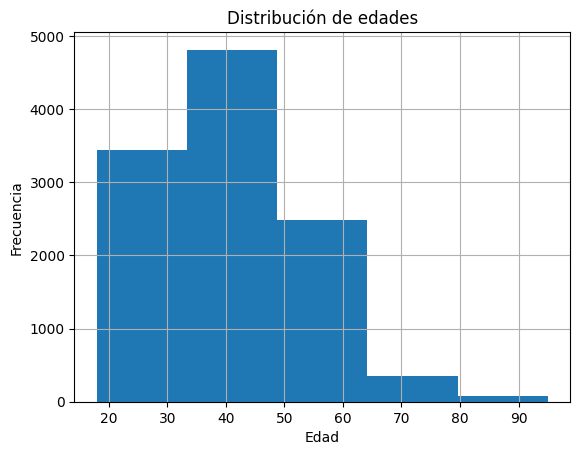

In [37]:
# Histograma de la edad para visualizar la distribución.
pddf['age'].hist(bins=5)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


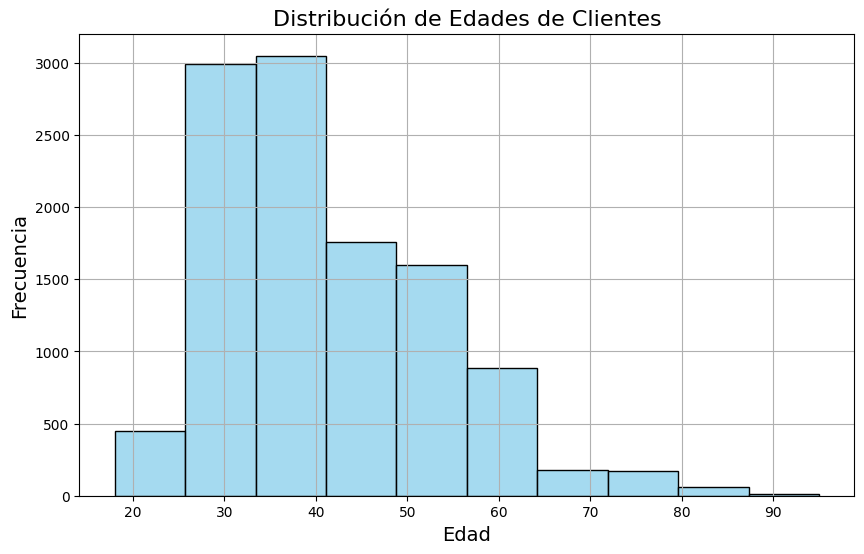

In [40]:
# Histograma más atractivo de la distribución de edades usando seaborn.
plt.figure(figsize=(10,6))
sns.histplot(pddf['age'], bins=10, kde=False, color='skyblue')
plt.title("Distribución de Edades de Clientes", fontsize=16)
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.grid(True)
plt.show()


### 5.2. Boxplots


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


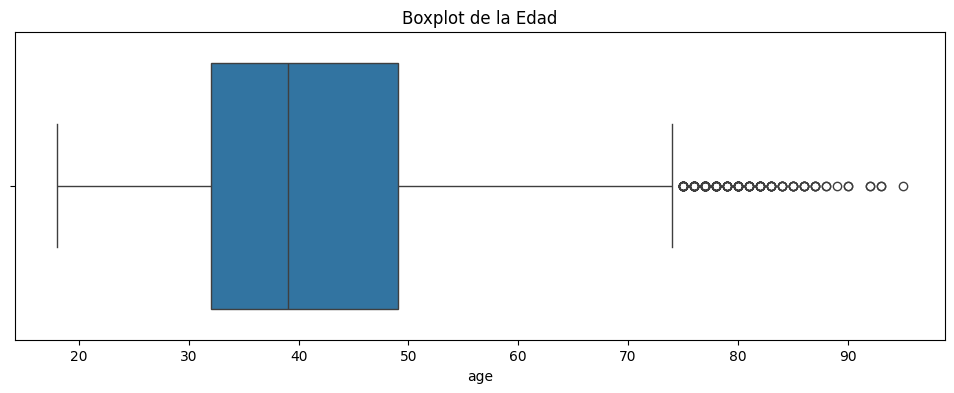

In [42]:
# Boxplot de la duración de la llamada.
plt.figure(figsize=(12,4))
sns.boxplot(x='age', data=pddf)
plt.title("Boxplot de la Edad")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: ylabel='age'>

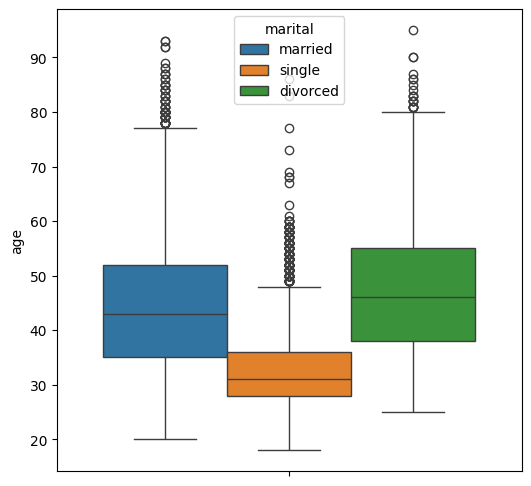

In [49]:
plt.figure(figsize=(6,6))
sns.boxplot(y='age', data=pddf, orient='y', hue='marital')

El boxplot nos permite visualizar la dispersión de los datos y detectar valores atípicos (outliers).



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: ylabel='age'>

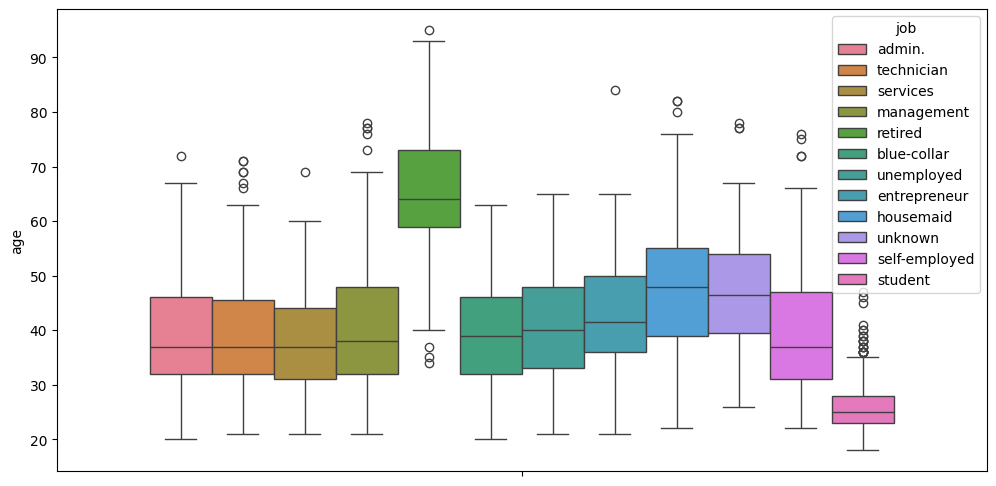

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(y='age', data=pddf, orient='y', hue='job')

**Identificación de outliers usando el rango intercuartílico (IQR)**


In [ ]:
# Calculamos los límites para detectar outliers.
Q1 = np.percentile(pddf['age'], 25)
Q3 = np.percentile(pddf['age'], 75)
RIC = Q3 - Q1
upper_limit = Q3 + 1.5*RIC
lower_limit = Q1 - 1.5*RIC
print(f"Límite superior: {upper_limit}")
print(f"Límite inferior: {lower_limit}")


El rango intercuartílico nos ayuda a identificar los outliers, o valores atípicos, que están muy alejados del rango normal de los datos.

## Conclusión:

Has completado el laboratorio de Introducción y Estadística Descriptiva utilizando Python. A lo largo del análisis, hemos utilizado diversas herramientas para explorar y entender el dataset de manera eficaz. Las técnicas mostradas aquí son aplicables a cualquier análisis de datos en Ciencia de Datos.

---

## Reto: Desafíos Estadísticos


A continuación, tienes seis preguntas retadoras para que pongas en práctica lo que has aprendido sobre estadística descriptiva y visualización de datos en Python. Utiliza el dataset de **Bank Marketing** para resolverlas. ¡Manos a la obra!


1. **¿Cuál es el coeficiente de variación del balance (`balance`) de los clientes?**  
   - Compara este coeficiente con el de las variables `age` (edad) y `duration` (duración). ¿Cuál de estas variables tiene mayor variabilidad relativa? ¿Por qué crees que ocurre esto?


2. **Realiza un análisis agrupado por nivel de educación (`education`) y calcula la media, mediana y desviación estándar del `balance` de los clientes.**  
   - ¿Existen diferencias significativas en el `balance` promedio entre los diferentes niveles educativos? ¿Qué implicaciones podría tener esto para una campaña de marketing?


3. **Calcula los rangos intercuartílicos (RIC) para las variables `duration` y `campaign` (número de contactos realizados durante la campaña).**  
   - Compara ambos RIC y discute cuál de las dos variables tiene una mayor dispersión alrededor de la mediana.


4. **Crea un histograma y un boxplot para la variable `balance`.**  
   - A partir de estos gráficos, identifica si existen valores atípicos (outliers) y describe cómo afectan la distribución del balance.


5. **Utilizando la función `groupby`, analiza la media y el rango intercuartílico (RIC) de la variable `duration` en función de la variable `job` (profesión).**  
   - ¿Qué profesiones tienden a tener mayor duración de llamadas? ¿Podrías identificar algún patrón que pueda interesar a un equipo de marketing?

6. **Usa el método de rangos estadísticos para dividir la variable `balance` en cinco categorías (bins).**  
   - Luego, crea una tabla que muestre el conteo de clientes en cada categoría y visualízalo en un gráfico de barras. ¿Qué puedes inferir sobre la distribución del `balance` de los clientes?



---
## Gracias por completar este laboratorio!